<a href="https://colab.research.google.com/github/jiiwon129/ESAA/blob/main/OB/%EA%B3%BC%EC%A0%9C/WEEK1/ESAA_OB_WEEK1_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 4 모델 훈련**

### **[개념 정리]**

#### **4.5 규제가 있는 선형 모델**

##### **4.5.1 릿지 회귀**

비용함수에 규제항 추가

: $\alpha\sum_{i=1}^{n}\theta_i^2$

- 모델의 가중치가 최소로 유지되도록 노력
- 규제항은 훈련하는 동안만 비용 함수에 추가 --> 훈련이 끝나면 모델의 성능을 **규제가 없는 성능 지표**로 평가

즉, 훈련 때 사용되는 비용 함수 & 평가에서 사용되는 성능 지표는 다름!

- $\alpha$: 얼마나 규제할 지 설정
  - ex. $\alpha$=0 --> 선형 회귀와 같아짐
  - ex. $\alpha$가 매우 커짐 --> 모든 가중치가 거의 0에 가까워짐

릿지 회귀의 비용 함수
  $J(\theta) = \text{MSE}(\theta) + \alpha\frac{1}{2}\sum_{i=1}^{n}\theta_i^2$

  - $\theta_0$: 편향은 규제되지 않음
  - $w$: 특성의 가중치 벡터($\theta_1$ ~ $\theta_n$)
    - 규제항: $ \frac{1}{2} (||\mathbf{w}||_2)^2 $
---
CAUTION!
- 릿지 회귀는 입력 특성의 스케일에 민감

  --> 데이터 스케일을 맞추는 것이 중요
  - ex) StandardScaler

$\text{*}$ 규제가 있는 모델은 대부분 마찬가지

---

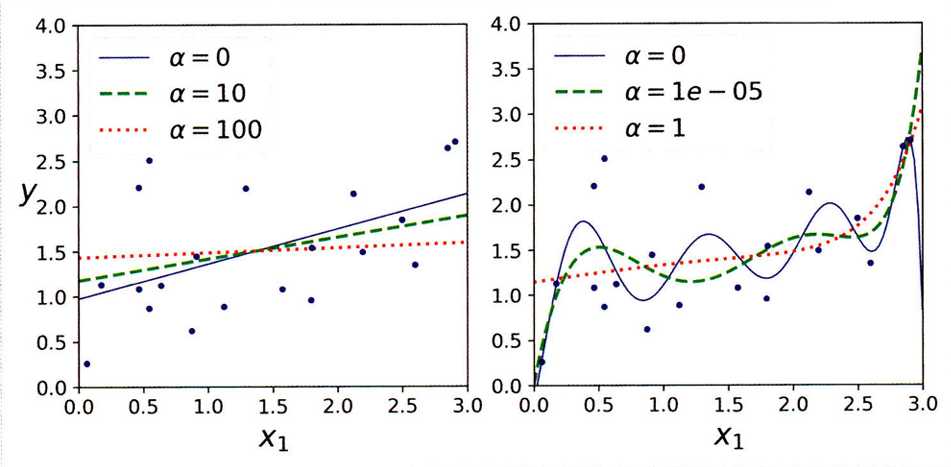

- $\alpha$를 증가시킬수록 직선에 가까워짐

  즉, 모델의 분산은 감소, 편향은 증가

릿지 회귀의 정규방정식
  
  $\hat{\boldsymbol\theta} = (\mathbf{X}^T\mathbf{X} + \alpha\mathbf{A})^{-1}\mathbf{X}^T\mathbf{y}$

  - $\alpha\mathbf{A}$: 편향에 해당하는 맨 왼쪽 위의 원소가 0인 (n+1)x(n+1)의 단위행렬



1. 정규방정식을 사용한 릿지 회귀
```
from sklearn.linear_model import Ridge
```
- Ridge(alpha, solver)
  - solver: auto(default), cholesky(희소 행렬이나 특이 행렬이 아닐 경우)

2. 경사하강법을 사용한 릿지 회귀
```
from sklearn.linear_model import SGDRegressor
```
- SGDRegressor(penalty)
  - penalty: 사용할 규제 지정
  - ex) "l2" --> $\frac{1}{2}(||\mathbf{w}||_2)^2$ 규제항 추가 (릿지 회귀와 같음)

##### **4.5.2 라쏘 회귀**

라쏘 회귀의 비용 함수

  $J(\theta) = \text{MSE}(\theta) + \alpha \sum_{i=1}^{n} |\theta_i|$

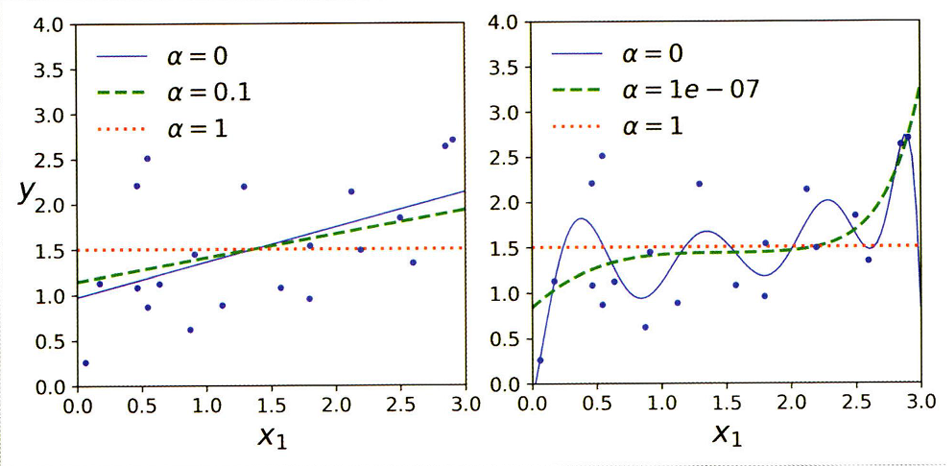

[라쏘 회귀의 중요한 특징]
- 덜 중요한 특성의 가중치를 제거! --> 가중치가 0이 됨

즉, 자동으로 특성을 선택하고 희소 모델(sparse model)을 만듦
- 0이 아닌 특성의 가중치가 적음

---

라쏘 회귀에서 경사 하강법이 최적점 근처에서 진동하는 것을 막기 위해서, 훈련하는 동안 점진적으로 학습률을 감소시켜야 함.

---

- 라쏘의 비용 함수는 $\theta_i$=0 ($i$=1,2, ... n)일 때 미분 불능 --> `Subgradient vector` $g$ 사용

라쏘 회귀의 서브그레디언트 벡터

  $g(\boldsymbol{\theta}, J) = \nabla_{\boldsymbol{\theta}}\text{MSE}(\boldsymbol{\theta}) + \alpha\begin{pmatrix} \text{sign}(\theta_1) \\ \text{sign}(\theta_2) \\ \vdots \\ \text{sign}(\theta_n) \end{pmatrix}$

  여기서 $\text{sign}(\theta_i) = \begin{cases} -1 & \theta_i < 0 \text{ 일 때} \\ 0 & \theta_i = 0 \text{ 일 때} \\ +1 & \theta_i > 0 \text{ 일 때} \end{cases}$

```
from sklearn.linear_model import Lasso
```
- Lasso(alpha)


##### **4.5.3 엘라스틱넷**

릿지 회귀와 라쏘 회귀를 혼합한 모델
- 규제항: 릿지와 라쏘 회귀의 규제항을 단순히 더해서 사용
- 혼합 비율 $r$
  - $r$=0: 릿지 회귀
  - $r$=1: 라쏘 회귀

엘라스틱넷 비용 함수

  $J(\theta) = \text{MSE}(\theta) + r\alpha \sum_{i=1}^{n} |\theta_i| + \frac{1-r}{2}\alpha \sum_{i=1}^{n} \theta_i^2$



---

[엘라스틱넷이 사용되는 경우]
- 평범한 선형 회귀는 피해야 함.
- 쓰이는 특성이 몇 개뿐이라고 의심되는 경우 라쏘나 엘라스틱이 나음. --> 불필요한 특성의 가중치를 0으로 만듦
- 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때 --> 보통 라쏘가 문제를 일으킴, 엘라스틱 선호

---

```
from sklearn.linear_model import ElasticNet
```
- ElasticNet(alpha, l1_ratio)

##### **4.5.4 조기 종료**

검증 에러가 최솟값에 도달하면 바로 훈련을 중지하는 것

---
확률적 경사 하강법(SGD)이나 미니배치 경사 하강법에서는 곡선이 그리 매끄럽지 않아 최솟값에 도달했는지 확인하기 어려움

--> 검증 에러가 일정 시간동안 최솟값보다 클 때(모델이 더 나아지지 않는다고 확신이 들 때) 학습을 멈추고 검증 에러가 최소였을 때의 모델 파라미터로 되돌리는 것

---

#### **4.6 로지스틱 회귀**

##### **4.6.1 확률 추정**

로지스틱 회귀 모델의 확률 추정(벡터 표현식)

$\hat{p} = h_\theta(\mathbf{x}) = \sigma(\theta^T\mathbf{x})$

- $\sigma$: 로지스틱 --. 0과 1 사이의 값을 출력하는 시그모이드 함수 (sigmoid function)

로지스틱 함수

$\sigma(t) = \frac{1}{1 + \exp(-t)}$

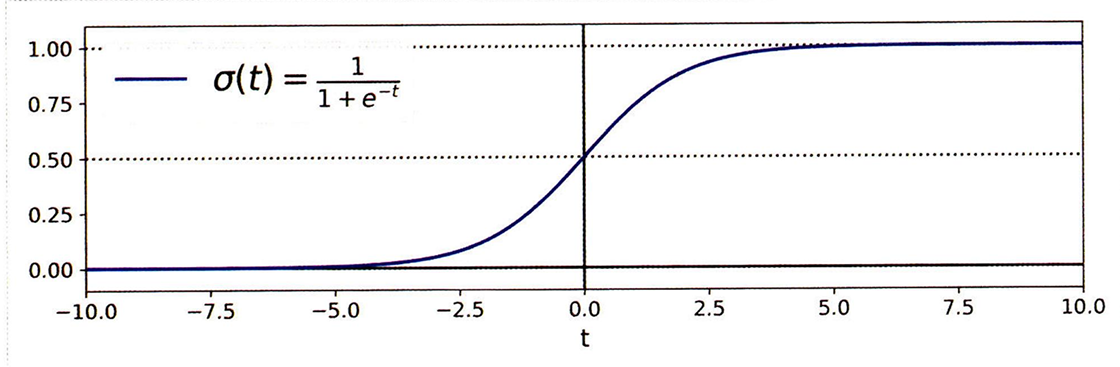



로지스틱 회귀 모델 예측

$\hat{y} = \begin{cases} 0 & \hat{p} < 0.5 \text{일 때} \\ 1 & \hat{p} \ge 0.5 \text{일 때} \end{cases}$

##### **4.6.2 훈련과 비용 함수**

하나의 훈련 샘플에 대한 비용 함수

  $c(\theta) = \begin{cases} -\log(\hat{p}) & y=1 \text{일 때} \\ -\log(1 - \hat{p}) & y=0 \text{일 때} \end{cases}$

  - $t$가 0에 가까워지면 $-\log({t})$가 매우 커지므로 타당함 --> 모델이 양성 샘플을 0에 가까운 확률로 추정하면 비용이 크게 증가할 것

  - $t$가 1에 가까워지면 $-log({t})$는 0에 가까워짐

  즉, 음성 샘플의 확률을 0에 가깝게 추정하거나 양성 샘플의 확률을 1에 가깝게 추정하면 비용이 0에 가까워질 것임!

---

전체 훈련 세트에 대한 비용 함수
- 모든 훈련 샘플의 비용을 평균한 것

[로지스틱 회귀의 비용 함수(로그 손실)]

$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}\log(\hat{p}^{(i)})+(1-y^{(i)})\log(1-\hat{p}^{(i)})]$

---




##### **4.6.3 결정 경계**

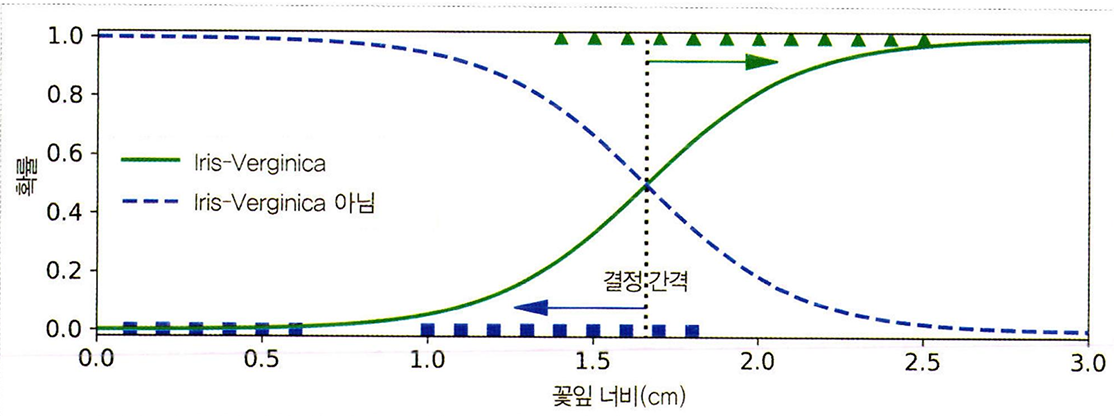

##### **4.6.4 소프트맥스 회귀**

로지스틱 회귀 모델
- 여러 개의 이진 분류기를 훈련시켜 연결 X --> 직접 다중 클래스를 지원하도록 일반화될 수 있음

이를 **소프트맥스 회귀(softmax regression)** 또는 **다항 로지스틱 회귀(multinomial logistic regression)**라 함.

1. 샘플 $\mathbf{x}$가 주어짐
2. 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 $s_k(\mathbf{x})$를 게산
3. 해당 점수에 소프트맥스 함수(또는 정규화된 지수 함수)를 적용하여 각 클래스의 확률 추정

클래스 k에 대한 소프트맥스 점수

$s_k(\mathbf{x}) = (\theta^{(k)})^T\mathbf{x}$

- 각 클래스는 자신만의 파라미터 벡터 $\theta^{(k)}$가 존재 --> 해당 벡터들은 파라미터 행렬 $\Theta$에 행으로 저장

[소프트맥스 함수]

$\hat{p}_k = \sigma(\mathbf{s}(\mathbf{x}))_k = \frac{\exp(s_k(\mathbf{x}))}{\sum_{j=1}^{K}\exp(s_j(\mathbf{x}))}$

- $K$: 클래스 수
- $\bf{s}(\mathbf{x})$: 샘플 $\mathbf{x}$에 대한 각 클래스의 점수를 담은 벡터
- $\sigma(\mathbf{s}(\mathbf{x}))_k$: 샘플 $\mathbf{x}$에 대한 각 클래스의 점수가 주어졌을 때, 이 샘플이 클래스 $k$에 속할 추정 확률

- 이 함수는 각 점수에 지수 함수를 적용한 후 정규화 --> 모든 지수 함수 결과의 합으로 나눔

[소프트맥스 회귀 분류기의 예측]

$\hat{y} = \operatorname*{argmax}_k \sigma(\mathbf{s}(\mathbf{x}))_k = \operatorname*{argmax}_k s_k(\mathbf{x}) = \operatorname*{argmax}_k((\theta^{(k)})^T \mathbf{x})$

- argmax: 함수를 최대화하는 변수의 값을 반환
  - 해당 식에서는 $\sigma(\mathbf{s}(\mathbf{x}))_k$값을 반환

---

소프트맥스 회귀 분류기는 한 번에 하나의 클래스만 예측! (다중 출력(X) 다중 클래스(O))

---

[크로스 엔트로피 비용 함수]

$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}y_k^{(i)}\log(\hat{p}_k^{(i)})$

- $y_k^{(i)}$: i번째 샘플이 클래스 k에 속할 타깃 확률 --> 일반적으로 샘플이 클래스에 속하는지 아닌지에 따라 1 또는 0으로 나타남

크로스 엔트로피는 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 종종 사용

[클래스 k에 대한 그레이디언트 벡터]

$\nabla_{\theta^{(k)}}J(\Theta) = \frac{1}{m}\sum_{i=1}^{m}(\hat{p}_k^{(i)}-y_k^{(i)})\mathbf{x}^{(i)}$



### **[필사]**

#### **4.5 규제가 있는 선형 모델**

##### **4.5.1 릿지 회귀**

정규방정식을 사용한 릿지 회귀

In [5]:
import numpy as np

m = 100
X = 6 * np.random.rand(m,1)-3
y = 0.5 * X **2 + X + 2 + np.random.randn(m,1)

In [6]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([5.33914018])

경사하강법을 사용한 릿지 회귀

In [7]:
from sklearn.linear_model import SGDRegressor

sgd_leg = SGDRegressor(penalty="l2")
sgd_leg.fit(X, y.ravel())
sgd_leg.predict([[1.5]])

array([5.32442113])

##### **4.5.2 라쏘 회귀**

In [8]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.2962726])

Lasso 대신 SGDRegressor(penalty="l1") 사용 가능

##### **4.5.3 엘라스틱넷**

In [9]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.29458703])

##### **4.5.4 조기 종료**

In [10]:
from sklearn.base import clone
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

# 데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
  ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

#### **4.6 로지스틱 회귀**

##### **4.6.1 확률 추정**

##### **4.6.2 훈련과 비용 함수**

##### **4.6.3 결정 경계**

In [11]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [17]:
X = iris["data"][:, 3:] # 꽃잎의 너비
y = (iris["target"] == 2).astype(int) # 1 Iris-Virginica면 1, 그렇지 않으면 0

In [18]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

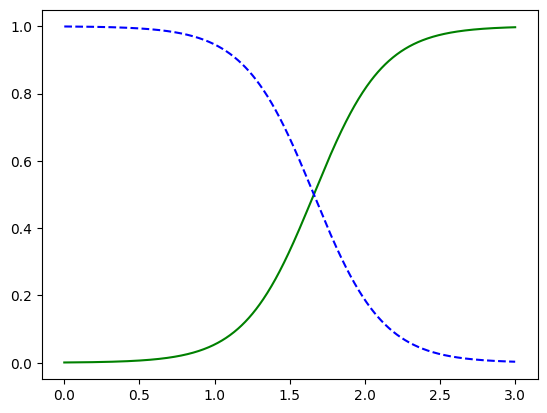

In [19]:
import matplotlib.pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

In [20]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [21]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [22]:
softmax_reg.predict([[5, 2]])

array([2])

In [23]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626374e-07, 5.73689802e-02, 9.42630398e-01]])